<h1>Track 3: Predicting 2024 Olympics Champion(s)!</h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

C:\Users\uchek\AppData\Local\Temp\ipykernel_13032\2577617356.py:10: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\uchek\AppData\Local\Temp\ipykernel_13032\2577617356.py:11: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


<h1>Objectives towards goal</h1>
<p>I am to utilize the datasets of the 2021 Tokyo Olympics Results to know what contenders are going to deal with in the 2024 Paris Olympics </p>
<ol>
<li>Data Collection and Processing</li>
<li>Data Analysis and EDA</li>
<li>Model Building</li>
<li>Details and Insights from Analysis</li>
</ol>

<h2>Data Collection and Processing</h2>

<h3>Working with the 2024 Data to see criteria for prediction</h3>

In [3]:
# Load datasets
events = pd.read_csv(r"C:\Users\uchek\Downloads\events (1).csv")
#we only need the events file as it contains the details we need to get to predict

In [4]:
events.head(2)

,event,tag,sport,sport_code,sport_url
0,Men's Individual,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery
1,Women's Individual,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery


In [5]:
events.describe().T

,count,unique,top,freq
event,329,288,Men,12
tag,329,45,athletics,48
sport,329,45,Athletics,48
sport_code,329,45,ATH,48
sport_url,329,45,https://olympics.com/en/paris-2024/sports/athl...,48


In [6]:
#eliminate useless rows and columns and handle missing data
# Remove the 'sport_url' column
events = events.drop(columns=['sport_url'])

In [7]:
events.head(1)

,event,tag,sport,sport_code
0,Men's Individual,archery,Archery,ARC


In [8]:
# Get unique values in the 'sport' column
unique_sports = events['sport'].unique()

# Display the unique values
print("\nUnique values in 'sport' column:")
print(unique_sports)

#lets make a list to save the above unique values
list_ofevents= list(events['sport'].unique())
print(f"There are {len(list_ofevents)} events in the 2024 Olympics!")


Unique values in 'sport' column:
['Archery' 'Artistic Gymnastics' 'Artistic Swimming' 'Athletics'
 'Badminton' 'Basketball' 'Basketball 3x3' 'Beach Volleyball' 'Boxing'
 'Breaking' 'Canoe Slalom' 'Canoe Sprint' 'Cycling BMX Freestyle'
 'Cycling BMX Racing' 'Cycling Mountain Bike' 'Cycling Road'
 'Cycling Track ' 'Diving' 'Equestrian' 'Fencing' 'Football' 'Golf'
 'Handball' 'Hockey' 'Judo' 'Marathon Swimming' 'Modern Pentathlon'
 'Rhythmic Gymnastics' 'Rowing' 'Rugby Sevens' 'Sailing' 'Shooting'
 'Skateboarding' 'Sport Climbing' 'Surfing' 'Swimming' 'Table Tennis'
 'Taekwondo' 'Tennis' 'Trampoline' 'Triathlon' 'Volleyball' 'Water Polo'
 'Weightlifting' 'Wrestling']
There are 45 events in the 2024 Olympics!


<h3>Working with 2021 Olympics Data</h3>

In [9]:
# Load datasets
medals = pd.read_excel(r"C:\Users\uchek\Downloads\Medals.xlsx")
sex = pd.read_excel(r"C:\Users\uchek\Downloads\EntriesGender.xlsx")
team = pd.read_excel(r"C:\Users\uchek\Downloads\Teams.xlsx")
athletes = pd.read_excel(r"C:\Users\uchek\Downloads\Athletes.xlsx")

c:\Users\uchek\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [10]:
# Inspect the datasets
l=[medals, sex, team, athletes]
for n in l:
    print(n.head(2))

# Check for missing values
for n in l:
    print(n.isnull().sum())


# Handle missing values if any
for n in l:
    print(n.dropna(inplace=True))


   Rank                    Team/NOC  Gold  Silver  Bronze  Total  \
0     1    United States of America    39      41      33    113   
1     2  People's Republic of China    38      32      18     88   

   Rank by Total  
0              1  
1              2  
       Discipline  Female  Male  Total
0  3x3 Basketball      32    32     64
1         Archery      64    64    128
      Name      Discipline                         NOC Event
0  Belgium  3x3 Basketball                     Belgium   Men
1    China  3x3 Basketball  People's Republic of China   Men
              Name     NOC           Discipline
0  AALERUD Katrine  Norway         Cycling Road
1      ABAD Nestor   Spain  Artistic Gymnastics
Rank             0
Team/NOC         0
Gold             0
Silver           0
Bronze           0
Total            0
Rank by Total    0
dtype: int64
Discipline    0
Female        0
Male          0
Total         0
dtype: int64
Name          0
Discipline    0
NOC           0
Event         0
dtype: 

In [11]:
print(medals.columns)
print(team.columns)
print(sex.columns)
print(athletes.columns)

# Rename 'Team/NOC' to 'NOC' in the medals dataframe
medals.rename(columns={'Team/NOC': 'NOC'}, inplace=True)

# Merge medals with team data on 'NOC'
merged_data = pd.merge(medals, team, how='inner', on='NOC')

# Merge the result with sex data on 'Discipline'
merged_data = pd.merge(merged_data, sex, how='inner', on='Discipline')

# Merge the result with athletes data on 'NOC' and 'Discipline'
merged_data = pd.merge(merged_data, athletes, how='inner', on=['NOC', 'Discipline'])

# Display the merged data
merged_data.head()


# Rename 'Team/NOC' to 'NOC' in the medals dataset
medals.rename(columns={'Team/NOC': 'NOC'}, inplace=True)


# Inspect the merged dataframe
print("Merged Data (medals + team) Columns:", merged_data.columns)



Index(['Rank', 'Team/NOC', 'Gold', 'Silver', 'Bronze', 'Total',
       'Rank by Total'],
      dtype='object')
Index(['Name', 'Discipline', 'NOC', 'Event'], dtype='object')
Index(['Discipline', 'Female', 'Male', 'Total'], dtype='object')
Index(['Name', 'NOC', 'Discipline'], dtype='object')
Merged Data (medals + team) Columns: Index(['Rank', 'NOC', 'Gold', 'Silver', 'Bronze', 'Total_x', 'Rank by Total',
       'Name_x', 'Discipline', 'Event', 'Female', 'Male', 'Total_y', 'Name_y'],
      dtype='object')


In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming the merged_data DataFrame is already created and contains the columns as shown

# Create Total_Medals column
merged_data['Total_Medals'] = merged_data['Gold'] + merged_data['Silver'] + merged_data['Bronze']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
merged_data['NOC'] = label_encoder.fit_transform(merged_data['NOC'])
merged_data['Discipline'] = label_encoder.fit_transform(merged_data['Discipline'])
merged_data['Event'] = label_encoder.fit_transform(merged_data['Event'])

# Handling the 'Name' column based on the existing columns (Name_x or Name_y)
if 'Name_x' in merged_data.columns:
    merged_data['Name'] = label_encoder.fit_transform(merged_data['Name_x'])
elif 'Name_y' in merged_data.columns:
    merged_data['Name'] = label_encoder.fit_transform(merged_data['Name_y'])
else:
    print("Column 'Name' does not exist in merged_data.")

# Drop the original Name_x and Name_y columns to avoid confusion
merged_data.drop(columns=['Name_x', 'Name_y'], inplace=True)

# Display the updated DataFrame
print(merged_data.head())


   Rank  NOC  Gold  Silver  Bronze  Total_x  Rank by Total  Discipline  Event  \
0     1   71    39      41      33      113              1           0     23   
1     1   71    39      41      33      113              1           0     23   
2     1   71    39      41      33      113              1           0     23   
3     1   71    39      41      33      113              1           0     23   
4     1   71    39      41      33      113              1           1     13   

   Female  Male  Total_y  Total_Medals  Name  
0      32    32       64           113   126  
1      32    32       64           113   126  
2      32    32       64           113   126  
3      32    32       64           113   126  
4      64    64      128           113   126  


<h3>Data Analysis and Explorartory Data Analysis</h3>

               Rank           NOC          Gold        Silver        Bronze  \
count  13288.000000  13288.000000  13288.000000  13288.000000  13288.000000   
mean      15.081126     38.164961     14.789284     13.792143     14.837673   
std       18.126249     21.232265     12.687975     12.439706      9.506308   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        4.000000     25.000000      4.000000      6.000000      6.000000   
50%        9.000000     37.000000     10.000000     10.000000     16.000000   
75%       17.000000     56.000000     22.000000     21.000000     22.000000   
max       86.000000     73.000000     39.000000     41.000000     33.000000   

            Total_x  Rank by Total    Discipline         Event        Female  \
count  13288.000000   13288.000000  13288.000000  13288.000000  13288.000000   
mean      43.419100      13.951535      8.997441     15.320665    442.918122   
std       33.348064      15.806872      5.107985

C:\Users\uchek\AppData\Local\Temp\ipykernel_13032\442296577.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='NOC', y='Total_Medals', data=merged_data, estimator=sum, ci=None)


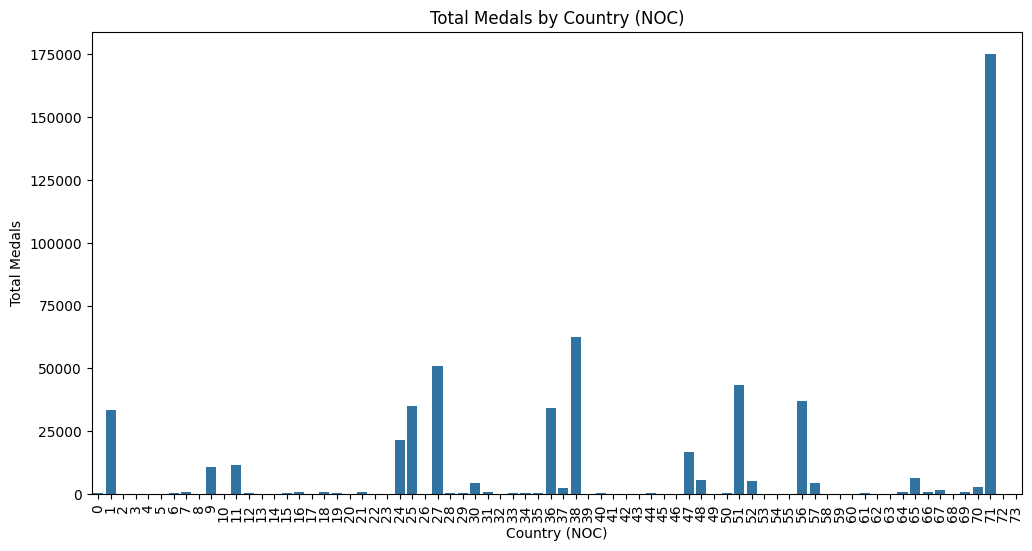

C:\Users\uchek\AppData\Local\Temp\ipykernel_13032\442296577.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Discipline', y='Total_Medals', data=merged_data, estimator=sum, ci=None)


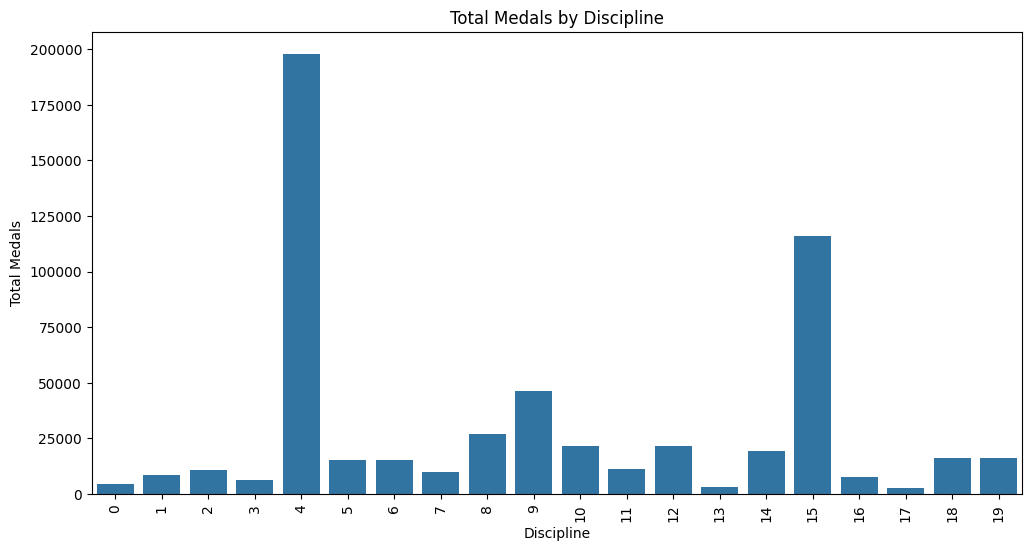

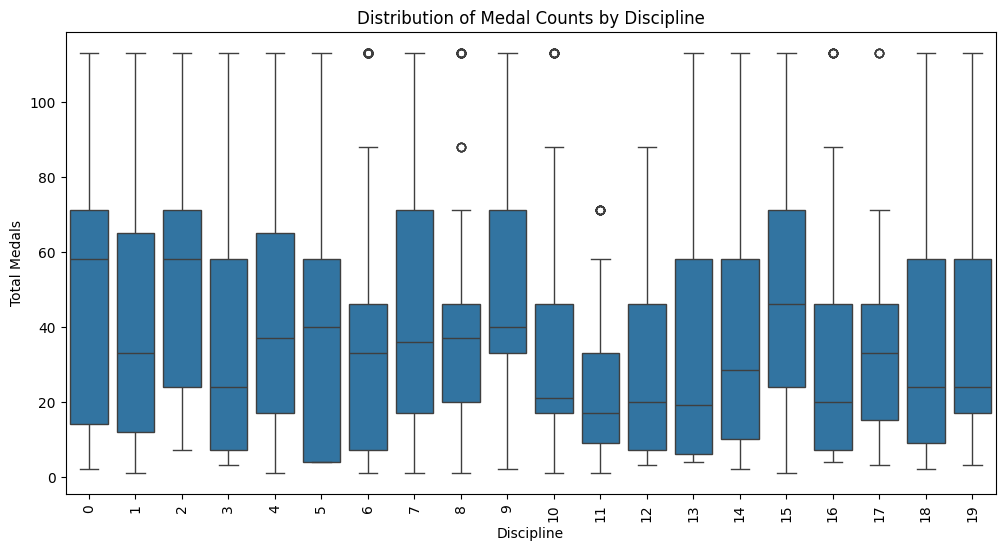

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_data is already processed
# Display a summary of the DataFrame
print(merged_data.describe())

# Plot the distribution of total medals by NOC (Country)
plt.figure(figsize=(12, 6))
sns.barplot(x='NOC', y='Total_Medals', data=merged_data, estimator=sum, ci=None)
plt.title('Total Medals by Country (NOC)')
plt.xticks(rotation=90)
plt.xlabel('Country (NOC)')
plt.ylabel('Total Medals')
plt.show()

# Plot the distribution of medals by Discipline
plt.figure(figsize=(12, 6))
sns.barplot(x='Discipline', y='Total_Medals', data=merged_data, estimator=sum, ci=None)
plt.title('Total Medals by Discipline')
plt.xticks(rotation=90)
plt.xlabel('Discipline')
plt.ylabel('Total Medals')
plt.show()

# Boxplot to visualize the spread of medal counts by Discipline
plt.figure(figsize=(12, 6))
sns.boxplot(x='Discipline', y='Total_Medals', data=merged_data)
plt.title('Distribution of Medal Counts by Discipline')
plt.xticks(rotation=90)
plt.xlabel('Discipline')
plt.ylabel('Total Medals')
plt.show()


In [14]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

# Create a Dash app
app = dash.Dash(__name__)

# Create a Plotly figure for Total Medals by Country
fig_country = px.bar(
    merged_data,
    x='NOC',
    y='Total_Medals',
    title='Total Medals by Country (NOC)',
    labels={'NOC': 'Country (NOC)', 'Total_Medals': 'Total Medals'},
    text='Total_Medals'
)

# Create a Plotly figure for Total Medals by Discipline
fig_discipline = px.bar(
    merged_data,
    x='Discipline',
    y='Total_Medals',
    title='Total Medals by Discipline',
    labels={'Discipline': 'Discipline', 'Total_Medals': 'Total Medals'},
    text='Total_Medals'
)

# Define the layout of the Dash app
app.layout = html.Div([
    html.H1("Olympics Medals Dashboard"),
    dcc.Graph(figure=fig_country),
    dcc.Graph(figure=fig_discipline)
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<h3>Model Buiding and Evaluation</h3>

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib





# Feature Engineering
merged_data['Total_Medals'] = merged_data['Gold'] + merged_data['Silver'] + merged_data['Bronze']
features = ['Gold', 'Silver', 'Bronze', 'Rank by Total', 'Female', 'Male', 'Total_Medals']
X = merged_data[features]

# Encode categorical variables
label_encoder_noc = LabelEncoder()
label_encoder_discipline = LabelEncoder()
label_encoder_event = LabelEncoder()

merged_data['NOC_encoded'] = label_encoder_noc.fit_transform(merged_data['NOC'])
merged_data['Discipline_encoded'] = label_encoder_discipline.fit_transform(merged_data['Discipline'])
merged_data['Event_encoded'] = label_encoder_event.fit_transform(merged_data['Event'])

# Save encoders for future use
joblib.dump(label_encoder_noc, r"C:\Users\uchek\Downloads\label_encoder_noc.pkl")
joblib.dump(label_encoder_discipline, r"C:\Users\uchek\Downloads\label_encoder_discipline.pkl")
joblib.dump(label_encoder_event, r"C:\Users\uchek\Downloads\label_encoder_event.pkl")

# Prepare target variable (you can adjust this based on the specific use case)
y = merged_data['Rank']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)



c:\Users\uchek\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       471
           2       1.00      1.00      1.00       151
           3       1.00      1.00      1.00       346
           4       1.00      1.00      1.00       233
           5       1.00      1.00      1.00       164
           6       1.00      1.00      1.00       197
           7       1.00      1.00      1.00       137
           8       1.00      1.00      1.00       214
           9       1.00      1.00      1.00       271
          10       1.00      1.00      1.00       256
          11       1.00      1.00      1.00       136
          12       1.00      1.00      1.00       166
          13       1.00      1.00      1.00        78
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        66
          16       1.00      1.00      1.00        67
          17       1.00      1.00      1.00

<h3>Encoded Values' Initial Forms</h3>

In [28]:

# Display the mappings for NOC, Discipline, and Event
def display_mappings(label_encoder, label_name):
    classes = label_encoder.classes_
    mapping = dict(zip(range(len(classes)), classes))
    print(f"{label_name} Encoding Mappings:")
    for key, value in mapping.items():
        print(f"{key}: {value}")

# Load the encoders (just to demonstrate how to use them for decoding)
label_encoder_noc = joblib.load(r"C:\Users\uchek\Downloads\label_encoder_noc.pkl")
label_encoder_discipline = joblib.load(r"C:\Users\uchek\Downloads\label_encoder_discipline.pkl")
label_encoder_event = joblib.load(r"C:\Users\uchek\Downloads\label_encoder_event.pkl")

#saving models and label encoding in case!
joblib.dump(rf_classifier, r"C:\Users\uchek\Downloads\rf_classifier.pkl")
joblib.dump(label_encoder_noc, r"C:\Users\uchek\Downloads\label_encoder_noc.pkl")
joblib.dump(label_encoder_discipline, r"C:\Users\uchek\Downloads\label_encoder_discipline.pkl")
joblib.dump(label_encoder_event, r"C:\Users\uchek\Downloads\label_encoder_event.pkl")


display_mappings(label_encoder_noc, "NOC")
display_mappings(label_encoder_discipline, "Discipline")
display_mappings(label_encoder_event, "Event")

NOC Encoding Mappings:
0: Argentina
1: Australia
2: Austria
3: Azerbaijan
4: Bahamas
5: Bahrain
6: Belarus
7: Belgium
8: Botswana
9: Brazil
10: Bulgaria
11: Canada
12: Chinese Taipei
13: Colombia
14: Croatia
15: Cuba
16: Czech Republic
17: Côte d'Ivoire
18: Denmark
19: Dominican Republic
20: Ecuador
21: Egypt
22: Estonia
23: Fiji
24: France
25: Germany
26: Ghana
27: Great Britain
28: Greece
29: Hong Kong, China
30: Hungary
31: India
32: Indonesia
33: Ireland
34: Islamic Republic of Iran
35: Israel
36: Italy
37: Jamaica
38: Japan
39: Kazakhstan
40: Kenya
41: Latvia
42: Lithuania
43: Malaysia
44: Mexico
45: Mongolia
46: Morocco
47: Netherlands
48: New Zealand
49: Nigeria
50: Norway
51: People's Republic of China
52: Poland
53: Portugal
54: Puerto Rico
55: Qatar
56: ROC
57: Republic of Korea
58: Republic of Moldova
59: Romania
60: Saudi Arabia
61: Serbia
62: Slovakia
63: Slovenia
64: South Africa
65: Spain
66: Sweden
67: Switzerland
68: Tunisia
69: Turkey
70: Ukraine
71: United States of 

<h3>Prediction by Model</h3>

<h4>Prediction based on given circumstances/factors</h4>

In [34]:
import pandas as pd
import joblib

# Load the trained model and encoders
rf_classifier = joblib.load(r"C:\Users\uchek\Downloads\rf_classifier.pkl")
label_encoder_noc = joblib.load(r"C:\Users\uchek\Downloads\label_encoder_noc.pkl")
label_encoder_discipline = joblib.load(r"C:\Users\uchek\Downloads\label_encoder_discipline.pkl")
label_encoder_event = joblib.load(r"C:\Users\uchek\Downloads\label_encoder_event.pkl")

# Example DataFrame with input features for prediction
data = {
    'Gold': [1, 0, 2],          # Example Gold medals for three different entries
    'Silver': [1, 2, 1],        # Example Silver medals
    'Bronze': [0, 1, 2],        # Example Bronze medals
    'Rank by Total': [10, 5, 1],# Example Rank by Total
    'Female': [3, 4, 2],        # Example number of Female participants
    'Male': [5, 6, 4],          # Example number of Male participants
    'Total_Medals': [1, 3, 5]   # Example Total Medals
}

# Create DataFrame
df_input = pd.DataFrame(data)

# Predict rankings
predicted_ranks = rf_classifier.predict(df_input)
df_input['Predicted_Rank'] = predicted_ranks

# Find the entry with the best rank
best_rank_index = df_input['Predicted_Rank'].idxmin()
best_rank_entry = df_input.loc[best_rank_index]

# Display the best rank and corresponding entry
print("Best Rank Prediction:")
print(best_rank_entry)


Best Rank Prediction:
Gold              2
Silver            1
Bronze            2
Rank by Total     1
Female            2
Male              4
Total_Medals      5
Predicted_Rank    1
Name: 2, dtype: int64


<h4>Vice Versa</h4>

In [47]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# Load the trained model and encoders
rf_classifier = joblib.load(r"C:\Users\uchek\Downloads\rf_classifier.pkl")
label_encoder_noc = joblib.load(r"C:\Users\uchek\Downloads\label_encoder_noc.pkl")
label_encoder_discipline = joblib.load(r"C:\Users\uchek\Downloads\label_encoder_discipline.pkl")
label_encoder_event = joblib.load(r"C:\Users\uchek\Downloads\label_encoder_event.pkl")

# Example input for prediction
# Replace these example values with actual values you want to predict
example_sport = 'Athletics'  # Example sport, replace with actual sport

# Encode the sport using the label encoder
encoded_sport = label_encoder_discipline.transform([example_sport])[0]

# Create a DataFrame with the required features and the encoded sport
example_data = pd.DataFrame({
    'Gold': [1],           # Example value for Gold medals
    'Silver': [2],         # Example value for Silver medals
    'Bronze': [1],         # Example value for Bronze medals
    'Rank by Total': [10], # Example value for Rank by Total
    'Female': [5],         # Example value for Female participants
    'Male': [7],           # Example value for Male participants
    'Total_Medals': [4]    # Example value for Total Medals
})

# Ensure the example_data columns match the features used during model training
example_data.columns = ['Gold', 'Silver', 'Bronze', 'Rank by Total', 'Female', 'Male', 'Total_Medals']

# Make a prediction
y_pred = rf_classifier.predict(example_data)

# Decode the prediction if it is encoded
decoded_prediction = y_pred[0]

# Display the prediction in a readable format
print("Predicted Rank:", decoded_prediction)

# Display the mappings for sports
def display_mappings(label_encoder, label_name):
    classes = label_encoder.classes_
    mapping = dict(zip(range(len(classes)), classes))
    print(f"{label_name} Encoding Mappings:")
    for key, value in mapping.items():
        print(f"{key}: {value}")

# Load the encoders (just to demonstrate how to use them for decoding)
label_encoder_discipline = joblib.load(r"C:\Users\uchek\Downloads\label_encoder_discipline.pkl")

display_mappings(label_encoder_discipline, "Sport")

# To demonstrate, print the encoded sport and its original value
decoded_sport = label_encoder_discipline.inverse_transform([encoded_sport])[0]
print(f"Encoded Sport: {encoded_sport}, Decoded Sport: {decoded_sport}")


Predicted Rank: 11
Sport Encoding Mappings:
0: 3x3 Basketball
1: Archery
2: Artistic Gymnastics
3: Artistic Swimming
4: Athletics
5: Baseball/Softball
6: Basketball
7: Beach Volleyball
8: Cycling Track
9: Fencing
10: Football
11: Handball
12: Hockey
13: Rhythmic Gymnastics
14: Rugby Sevens
15: Swimming
16: Table Tennis
17: Triathlon
18: Volleyball
19: Water Polo
Encoded Sport: 4, Decoded Sport: Athletics


<footer>DesksonFire</footer>